In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# 600 or so because some over ocean
print(len(cities))
print(cities)

605
['tasiilaq', 'tuktoyaktuk', 'castro', 'rikitea', 'krasnyy yar', 'bethel', 'tateyama', 'ushuaia', 'nikolskoye', 'rorvik', 'chuy', 'kaeo', 'cayenne', 'moroni', 'mataura', 'yulara', 'hermanus', 'changde', 'bengkulu', 'illoqqortoormiut', 'chokurdakh', 'albany', 'ilulissat', 'busselton', 'puerto ayora', 'barrow', 'san patricio', 'kalmar', 'cartagena', 'dikson', 'the pas', 'turtas', 'cherskiy', 'butaritari', 'east london', 'omboue', 'ascension', 'bluff', 'mahebourg', 'carnarvon', 'airai', 'talnakh', 'kuche', 'hamilton', 'star', 'jardim', 'cape town', 'faanui', 'pandan', 'andenes', 'thompson', 'hilo', 'amderma', 'ingraj bazar', 'den helder', 'jamestown', 'robertsport', 'russell', 'namatanai', 'banda aceh', 'hithadhoo', 'lebu', 'taolanaro', 'sao joao da barra', 'muana', 'nemuro', 'fortuna', 'paita', 'tiksi', 'kodiak', 'goure', 'namibe', 'thinadhoo', 'port elizabeth', 'fairbanks', 'hobart', 'constitucion', 'ribeira grande', 'port blair', 'katsuura', 'bathsheba', 'vila franca do campo', 'car

## Perform API Calls

In [51]:
# OpenWeatherMap API Key
api_key = api_keys.api_key


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="


In [52]:
# set up lists to hold reponse info
city_list = []
lat = []
temp = []
humid = []
clouds = []
wind = []

# Loop through the list of cities and perform a request for data on each

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        #print(response)
        city_list.append(response['name'])
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])


    except KeyError:
        print("KeyError")
        
print(f"The latitude information received is: {lat}")            
print(f"The temperature information received is: {temp}")
print(f"The humidity information received is: {humid}")
print(f"The cloud coverage information received is: {clouds}")
print(f"The wind speed information received is: {wind}")


KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
KeyError
The latitude information received is: [65.61, 69.44, -42.48, -23.12, 50.7, 60.79, 36.66, -54.81, 59.7, 64.86, -33.69, -35.1, 4.94, 39.52, -46.19, -25.24, -34.42, 29.04, 70.62, 42.65, 69.22, -33.64, -0.74, -38.31, -26.98, 56.66, 37.63, 73.51, 53.82, 58.94, 68.75, 3.07, -33.02, -1.57, -23.58, -20.41, -30.97, -8.93, 69.49, 32.3, 53.62, -21.48, -33.93, -16.48, 11.72, 55.74, 19.71, 25, 52.96, -33.21, 6.75, -33.01, -3.66, 5.56, -0.6, 8

In [53]:
print(response['name'])

Palmer


In [54]:
print(len(wind))
print(len(city_list))

542
542


In [55]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_list,
    "Latitude" : lat,
    "Temperature": temp,
    "Humidity": humid,
    "Cloud Coverage": clouds,
    "Wind Speed": wind
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Latitude,Temperature,Humidity,Cloud Coverage,Wind Speed
0,Tasiilaq,65.61,44.60,98,88,5.82
1,Tuktoyaktuk,69.44,39.20,93,90,33.33
2,Castro,-42.48,48.89,77,48,3.83
3,Rikitea,-23.12,73.01,100,32,12.88
4,Krasnyy Yar,50.70,66.89,51,0,6.62


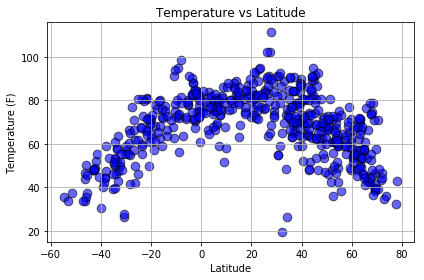

In [62]:
plt.scatter(lat, temp, s = 75, marker="o", facecolors="blue", alpha = 0.60, edgecolor = "black")
# Incorporate the other graph properties
plt.grid(axis='both')
plt.title("Temperature vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#Tight fit layout
plt.tight_layout()

# Save Figure
plt.savefig("T_vs_lat.png")

# Show plot
plt.show()

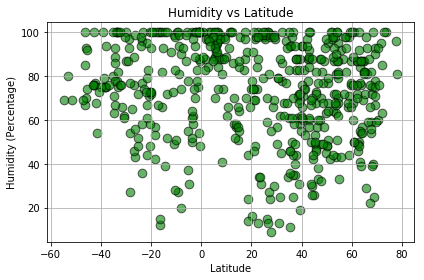

In [64]:
plt.scatter(lat, humid, s = 75, marker="o", facecolors="green", alpha = 0.60, edgecolor = "black")
# Incorporate the other graph properties
plt.grid(axis='both')
plt.title("Humidity vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (Percentage)")
#Tight fit layout
plt.tight_layout()

# Save Figure
plt.savefig("Hum_vs_lat.png")

# Show plot
plt.show()

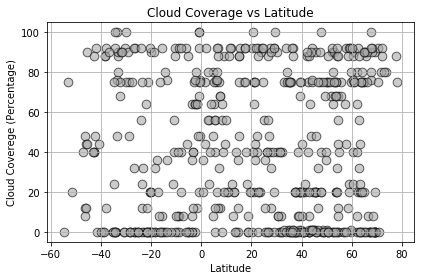

In [66]:
plt.scatter(lat, clouds, s = 75, marker="o", facecolors="darkgray", alpha = 0.60, edgecolor = "black")
# Incorporate the other graph properties
plt.grid(axis='both')
plt.title("Cloud Coverage vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverege (Percentage)")
#Tight fit layout
plt.tight_layout()

# Save Figure
plt.savefig("Clouds_vs_lat.png")

# Show plot
plt.show()

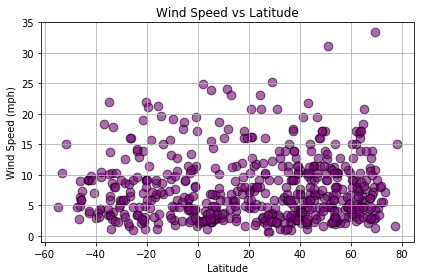

In [67]:
plt.scatter(lat, wind, s = 75, marker="o", facecolors="purple", alpha = 0.60, edgecolor = "black")
# Incorporate the other graph properties
plt.grid(axis='both')
plt.title("Wind Speed vs Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
#Tight fit layout
plt.tight_layout()

# Save Figure
plt.savefig("wind_vs_lat.png")

# Show plot
plt.show()

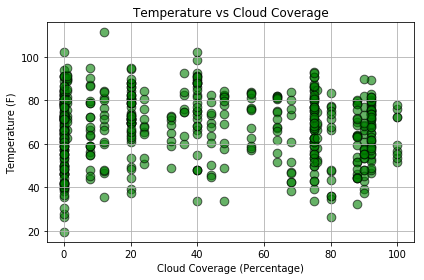

In [68]:
plt.scatter(clouds, temp, s = 75, marker="o", facecolors="green", alpha = 0.60, edgecolor = "black")
# Incorporate the other graph properties
plt.grid(axis='both')
plt.title("Temperature vs Cloud Coverage")
plt.xlabel("Cloud Coverage (Percentage)")
plt.ylabel("Temperature (F)")
#Tight fit layout
plt.tight_layout()

# Save Figure
plt.savefig("Temp_vs_clouds.png")

# Show plot
plt.show()

In [ ]:
# Observable Trends
#1) It is Summer in the Northern Hemisphere.  The highest sun angle is around 20 degrees, hence I see a peak in temperatures there.
#2) The 30 degree latitude belt has deserts in the Northern Hemisphere.  I notice low humidity values around 30 degrees.
#3) Most cities have a wind speed below 10 mph.